#### [Chapter 3](https://github.com/Ziaeemehr/netsci/blob/main/examples/chap_04.ipynb)

#### **THE SCALE-FREE PROPERTY**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/netsci/blob/main/examples/chap_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment and run this line to install the package on colab
# !pip install "git+https://github.com/Ziaeemehr/netsci.git" -q

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from netsci.utils import generate_power_law_dist, generate_power_law_dist_bounded

In [88]:
LABELSIZE = 13
plt.rc('axes', labelsize=LABELSIZE)
plt.rc('axes', titlesize=LABELSIZE)
plt.rc('figure', titlesize=LABELSIZE)
plt.rc('legend', fontsize=LABELSIZE)
plt.rc('xtick', labelsize=LABELSIZE)
plt.rc('ytick', labelsize=LABELSIZE)
# set legend font size 
plt.rc('legend', fontsize=10)

Comparing Poisson and Powe-law Distributions

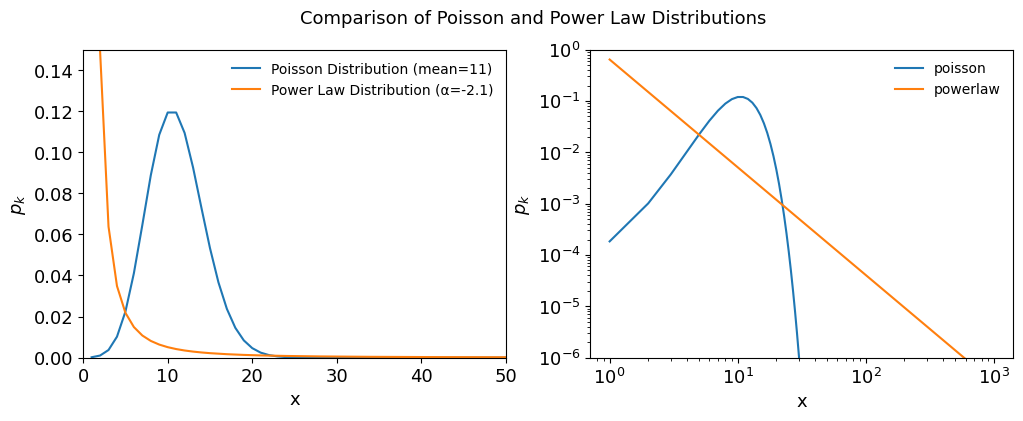

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
mean_poisson = 11
alpha_power_law = 2.1
x_values = np.arange(1, 1000)

# Poisson Distribution
poisson_pmf = poisson.pmf(x_values, mean_poisson)

# Power Law Distribution
power_law_pdf = x_values ** (-alpha_power_law)
# Normalize power-law PDF to make it a valid probability distribution
power_law_pdf /= np.sum(power_law_pdf)

# Plotting

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(x_values, poisson_pmf, label='Poisson Distribution (mean=11)')
ax[0].plot(x_values, power_law_pdf, label='Power Law Distribution (α=-2.1)')
ax[0].set_xlim([0,50])
ax[0].set_ylim([0,0.15])
ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$p_k$')
fig.suptitle('Comparison of Poisson and Power Law Distributions')
ax[0].legend(frameon=False)
ax[1].loglog(x_values, poisson_pmf, label="poisson")
ax[1].loglog(x_values, power_law_pdf, label="powerlaw")
ax[1].set_ylim([1e-6, 1])
ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$p_k$')
ax[1].legend(frameon=False);

#### Generate the powerlaw distribution (bounded)

In [6]:
generate_power_law_dist?

Signature: generate_power_law_dist(N: int, a: float, xmin: float)
Docstring:
generate power law random numbers p(k) ~ x^(-a) for a>1

Parameters
-----------
N:
    is the number of random numbers
a:
    is the exponent
xmin:
    is the minimum value of distribution

Returns
-----------
value: np.array
    powerlaw distribution
File:      ~/git/workshops/network_science/netsci/netsci/utils.py
Type:      function

In [22]:
generate_power_law_dist_bounded?

Signature: generate_power_law_dist_bounded(N: int, a: float, xmin: float, xmax: float)
Docstring:
Generate a power law distribution of floats p(k) ~ x^(-a) for a>1
which is bounded by xmin and xmax

parameters :
    N: int
        number of samples in powerlaw distribution (pwd).
    e: 
        exponent of the pwd.
    xmin: 
        min value in pwd.
    xmax: 
        max value in pwd.
File:      ~/git/workshops/network_science/netsci/netsci/utils.py
Type:      function

plotting the powerlaw distributions

In [41]:
def plot_distribution(vrs, N, a, xmin, ax, labelsize=10):

    # plotting the PDF estimated from variates
    bin_min, bin_max = np.min(vrs), np.max(vrs)
    bins = 10**(np.linspace(np.log10(bin_min), np.log10(bin_max), 100))
    counts, edges = np.histogram(vrs, bins, density=True)
    centers = (edges[1:] + edges[:-1])/2.

    # plotting the expected PDF
    xs = np.linspace(bin_min, bin_max, N)
    expected_pdf = [(a-1) * xmin**(a-1) * x**(-a) for x in xs] # according to eq. 4.12 network science barabasi 2016
    ax.loglog(xs, expected_pdf, color='red', ls='--', label=r"$x^{-\gamma}$,"+ r"${\gamma}$="+f"{-a:.2f}")
    ax.loglog(centers, counts, 'k.', label='data')
    ax.legend(fontsize=labelsize)
    ax.set_xlabel("values")
    ax.set_ylabel("PDF")
    

1.0009632650699485 25.026683950827046


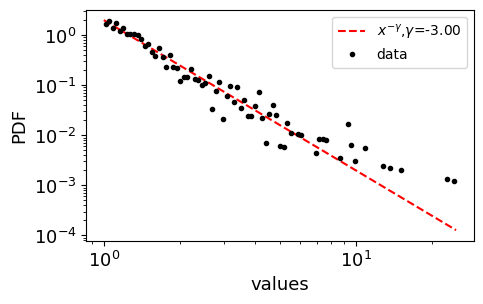

In [42]:
np.random.seed(2)

N = 1000
a = 3.0
xmin = 1
xmax = 100

fig, ax = plt.subplots(1, figsize=(5,3))
x = generate_power_law_dist_bounded(N, -a, xmin, xmax)
print (np.min(x), np.max(x))
plot_distribution(x, N, a, xmin, ax)


In [78]:
# find the exponent by fitting a power law by powerlaw package

import powerlaw
fit = powerlaw.Fit(x) # xmax=50 we can constrain the max value for fitting
print(f"{fit.power_law.alpha=}") # the exponent
print(f"{fit.power_law.sigma=}") # standard error

Calculating best minimal value for power law fit
fit.power_law.alpha=np.float64(2.971341605276792)
fit.power_law.sigma=np.float64(0.09251964578486563)


### Powerlaw package

- Alstott, J., Bullmore, E. and Plenz, D., 2014. powerlaw: a Python package for analysis of heavy-tailed distributions. PloS one, 9(1), p.e85777.

    - probability density function (PDF), 
    - cumulative distribution function (CDF)
    - complementary cumulative distribution (CCDF)

Calculating best minimal value for power law fit
fit.power_law.alpha=np.float64(2.971341605276792)
fit.power_law.sigma=np.float64(0.09251964578486563)
----------------------------------------------------------------------
(np.float64(56.01548271676191), np.float64(0.0005470709253119331))


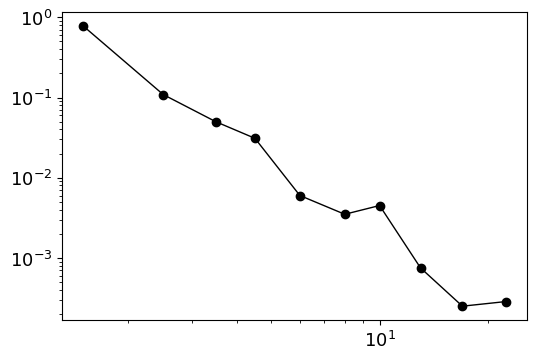

In [76]:
import powerlaw
fig, ax = plt.subplots(1, figsize=(6,4))
fit = powerlaw.Fit(x) # xmax=50
print(f"{fit.power_law.alpha=}")
print(f"{fit.power_law.sigma=}")
print("-"*70)
print(fit.distribution_compare("power_law", "exponential"))

powerlaw.plot_pdf(x, linear_bins=0, color='k', marker='o', lw=1, ax=ax);

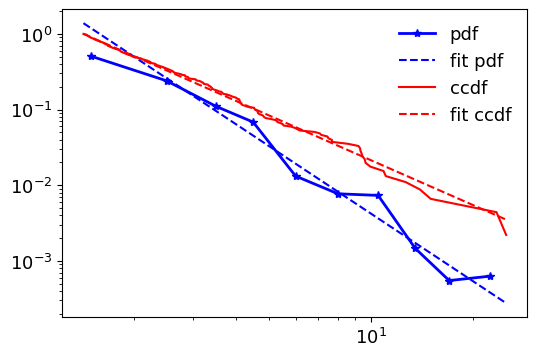

In [75]:
fig, ax = plt.subplots(1, figsize=(6,4))
fit.plot_pdf(c='b', lw=2, marker="*", label='pdf', ax=ax)
fit.power_law.plot_pdf(c='b', ax=ax, ls='--', label='fit pdf')
fit.plot_ccdf(c='r', ax=ax, ls="-", label='ccdf')
fit.power_law.plot_ccdf(c='r', ax=ax, ls='--', label='fit ccdf')
ax.legend(frameon=False);
